# California District Housing
## By Sambit Sahoo

## Introduction:
I will be creating machine learning models in an attempt to accurately predict the median housing value in each district in California. In this notebook, I utilize data science and machine learning skills. After collecting and collecting the data, I complete a short analysis to understand the data set further. Then, I create three machine learning models: decision tree, k nearest neighbors, and neural networks. 

## Motivation:
Although this data set is based on the median house values from the census in 1990, I was curious to see whether machine learning models could accurately predict the prices based on the given features. I wanted to understand what the relationship between a district being near a city or the coastline had on the price. If it’s able to accurately predict the prices based on a census in 1990, I would like to see the change in prices and model accuracy for the most recent census in 2020. 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


## Data Collection:
The data set I am using was found on Kaggle (https://www.kaggle.com/datasets/fedesoriano/california-housing-prices-data-extra-features). There are many datasets that are available for data science and machine learning processes on the website.\
\
There are a total of 20,640 data points. There are 13 features present in the data. These features include the median income, median age, total rooms, total bedrooms, population, number of households, latitude, longitude, and distance to the coastline and big cities, such as Los Angeles, San Diego, San Jose, and San Franciso for each district in California. The goal is to use these features to accurately predict the median house value for each district. 


In [2]:
# read in csv file
df = pd.read_csv('California_Houses.csv')
print(df.shape)
df.head()

(20640, 14)


,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


## Data Curation:
Luckily, there do not seem to be any missing values in the data set. If there were some null values in the data frame, I would’ve removed the row since we have a sufficient amount of data points already. 


In [3]:
# checking for null values in dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

## EDA:
I started by creating a correlation table. This helps me understand which features are correlated with median housing value. Looking at the top row, I can see that there is a strong positive correlation between median housing value and median income with a value of 0.688. Also, there is a moderate negative correlation between the median housing value and distance to the coastline with a value of -0.469. This information could be vital for deciding the splits for the decision tree I make later on. 


In [4]:
# understand the bases of the dataframe
df.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


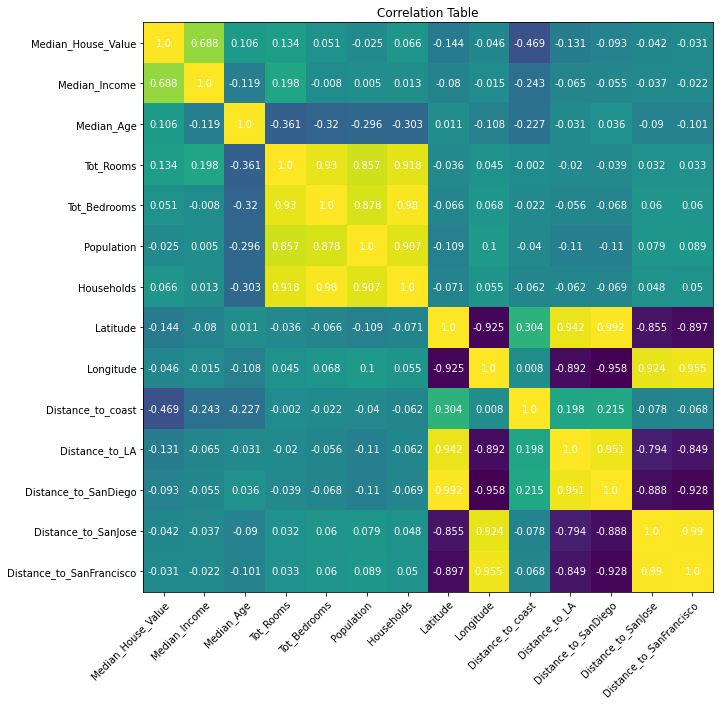

In [5]:
# correlation values from the data frame, rounded to the thousandths
correlation = df.corr().round(3)
corr_lst = list()
# added the values to a list, 2D array
for index in range(len(correlation)):
    corr_lst.append(correlation.iloc[index].values)
# creating a visualization for the correlation table
corr_lst = np.array(corr_lst)
fig, ax = plt.subplots()
im = ax.imshow(corr_lst)
fig.set_size_inches(10, 10)
ax.set_title("Correlation Table")
ax.set_xticks(np.arange(len(corr_lst)), labels=df.columns)
ax.set_yticks(np.arange(len(corr_lst[0])), labels=df.columns)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
for i in range(len(corr_lst)):
    for j in range(len(corr_lst[0])):
        text = ax.text(j, i, corr_lst[i, j], ha = 'center', va = 'center', color = 'w')
plt.show()

In [6]:
# absolute value of the top row of correlation table
corr_target = abs(correlation['Median_House_Value'])
relevant_features = corr_target[corr_target > 0.1]
print(relevant_features)

Median_House_Value    1.000
Median_Income         0.688
Median_Age            0.106
Tot_Rooms             0.134
Latitude              0.144
Distance_to_coast     0.469
Distance_to_LA        0.131
Name: Median_House_Value, dtype: float64


I will be removing the features that have little to no correlation with the median house value. Now, we have 6 features that we will use for predicting the median house value. These features are median income, median age, total rooms, latitude, distance to the coast, and distance to Los Angeles. \
\
My feature set, X, includes the 20,640 data points with the values for the features I listed above. My target set, y, includes the median housing values from the 20,640 data points.

In [7]:
# dropping the features with low correlation scores, less than 0.1
drop_features = corr_target[corr_target <= 0.1]
# created X and y sets
y = df['Median_House_Value'].values
drop = list(drop_features.to_frame().index)
drop.append('Median_House_Value')
X = df.drop(drop, axis=1).values

## Machine Learning Models:
I split my training data and test set, so that 80% of my data points are in the training data and the other 20% are in the testing data. Now, I can use this to create three machine learning models: decision trees, k nearest neighbors, and neural networks.

In [8]:
# train set of 0.8, test of 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Decision Trees
Here is some documentation for sklearn's DecisionTreeRegressor if you want to explore the other parameters that I left as default in my model: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html \
\
My approach for the decision tree was to experiment with the different criterion and max depths. The four criterions that I used were squared error, friedman mean squared error, absolute error, and poisson. The max depths that I used ranged from 1 to 15. I kept track of the best test accuracy. \
\
I found the best test accuracy when I ran the decision tree model with a max depth of 11 and the poisson criterion. The training accuracy was 84.94% and the test accuracy was 71.51%. I created a model showing the training and test accuracy for various max depths. After a max depth of 11, it appears that the model is overfitting the data. This is evident since the training accuracy continues to increase, but the test accuracy begins to decrease. 

The best testing accuracy with a depth of 11 using the criterion: poisson. The train accuracy is 0.8494 and the test accuracy is 0.7151.


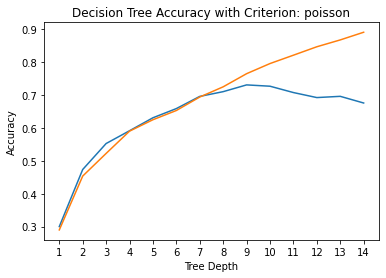

In [9]:
# Decision Trees
crit = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
max_test = (-1, 0, '')
scores = []
# trying the 4 criterion and 14 max depths, kept track of best test accuracy
for index, c in enumerate(crit): 
    train_score, test_score = list(), list()
    max_test = (-1, 0, '', -1)
    for x in range(1, 15):
        tree = DecisionTreeRegressor(max_depth=x, criterion=c)
        tree.fit(X_train, y_train)
        train_score.append(tree.score(X_train, y_train))
        test_score.append(tree.score(X_test, y_test))
        if tree.score(X_test, y_test) > max_test[1]:
            max_test = (x, tree.score(X_test, y_test), c, index)
    scores.append(train_score)
    scores.append(test_score)
# plotting the poisson accuracy
plt.title("Decision Tree Accuracy with Criterion: " + str(max_test[2]))
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.xticks(range(1,15))
plt.plot(range(1,15), scores[max_test[3]])
plt.plot(range(1,15), scores[max_test[3] + 1])
bestDT = DecisionTreeRegressor(max_depth=max_test[0])
bestDT.fit(X_train, y_train)
y_pred = bestDT.predict(X_test)
print("The best testing accuracy with a depth of", max_test[0], "using the criterion: " + max_test[2] + ". The train accuracy is", bestDT.score(X_train, y_train).round(4), "and the test accuracy is", str(bestDT.score(X_test, y_test).round(4))+".")

I also made a visualization of the optimal decision tree. Unfortunately, the size of the decision tree is so large, it is difficult to read. The first split was based on the first feature in X, which was the median income. Median income was the feature that had the strongest correlation with y, the median house values. The orange line is the training accuracy and the blue line is the test accuracy.

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import graphviz 

# creating DT visualization
steps=[
       ('dt', DecisionTreeRegressor(max_depth=11, criterion='poisson', random_state=0))
      ]
model1=Pipeline(steps)
model1 = model1.fit(X_train, y_train)
y_train_pred=model1.predict(X_train)
temp2=model1.steps[0][1].fit(X_train, y_train)

dot_data = tree.export_graphviz(temp2, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("rf_regressor") 
dot_data = tree.export_graphviz(temp2, out_file=None, 
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## K Nearest Neighbors (KNN): 
Here is some documentation for sklearn’s KNeighborsRegressor if you want to explore the other parameters that I left as default in my model: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html \
\
My approach for k nearest neighbors was to experiment with the various k values. I created models ranging from 1 to 14 neighbors. Then, I made a graph to see the effect the different numbers of neighbors had on the accuracy of the training and test data. When k was a small value, ranging from 1 to 3, it was overfitting the data since the training accuracy was very high, but the test accuracy was fairly low. When the k value was large, greater than 10, it was underfitting the data since the training accuracy was continuing to decrease and the test accuracy started to decrease from its peak. The optimal model had 7 neighbors. This model had an 82.82% training accuracy and 75.08% test accuracy.


The best testing accuracy with 7 neighbors. The train accuracy is 0.8282 and the test accuracy is 0.7508.


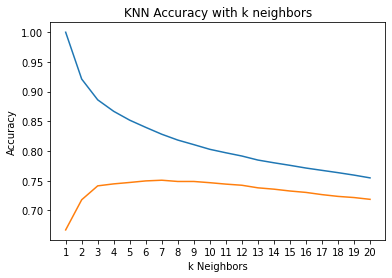

In [11]:
# K Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor
X = df.loc[:, df.columns != 'Median_House_Value']
y = df['Median_House_Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
train_score, test_score = list(), list()
max_test = (-1, 0)
# k values of 1 to 20 to find optimal amount of neighbors
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))
    if knn.score(X_test, y_test) > max_test[1]:
        max_test = (k, knn.score(X_test, y_test))
# plot the accuracy
plt.title("KNN Accuracy with k neighbors")
plt.xlabel("k Neighbors")
plt.ylabel("Accuracy")
plt.xticks(range(1,21))
plt.plot(range(1,21), train_score)
plt.plot(range(1,21), test_score)
bestKNN = KNeighborsRegressor(n_neighbors=max_test[0])
bestKNN.fit(X_train, y_train)
y_pred = bestKNN.predict(X_test)
print("The best testing accuracy with", max_test[0], "neighbors. The train accuracy is", bestKNN.score(X_train, y_train).round(4), "and the test accuracy is", str(bestKNN.score(X_test, y_test).round(4))+".")

The visualization above shows the train and test accuracy with various numbers of k neighbors. The training accuracy is the line in blue and the test accuracy is the line in orange.

## Neural Networks (NN): 
Here is some documentation for sklearn’s MLPRegressor if you want to explore the other parameters that I left as default in my model: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html.
Also, I used a StandardScaler to normalize my data. For more information on this, visit this site: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html \
\
My approach for neural networks was to experiment with various amounts of hidden layers and the number of neurons in each layer. I found the most success with the training and testing accuracy with three hidden layers, each with 64 neurons. I also used the rectified linear unit activation and capped my max iterations to 2000. After this, I got decent results, but it could be better. The neural network’s train accuracy was 72.94% and test accuracy was 72.49%. Next, I used StandardScaler to normalize my data. This improved the results drastically. The new train accuracy was 82.22% and the test accuracy was 80.19%.

In [12]:
# Neural Networks
from sklearn.neural_network import MLPRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
nn = MLPRegressor()
# using NN with 3 hidden layers with 64 neurons each
nn = MLPRegressor(activation='relu', hidden_layer_sizes=(64,64,64), max_iter=2000)
nn.fit(X_train, y_train)

pred = nn.predict(X_test)
print("Train Accuracy:", nn.score(X_train, y_train))
print("Test Accuracy:", nn.score(X_test, y_test))

Train Accuracy: 0.7294372303775051
Test Accuracy: 0.7249272364733184


In [13]:
# normalize the data
scX = StandardScaler()
X_tr = scX.fit_transform(X_train)
X_te = scX.transform(X_test)

nn = MLPRegressor(activation='relu', hidden_layer_sizes=(64,64,64), max_iter=2000)
nn.fit(X_tr, y_train)
y_pred = nn.predict(X_te)
print("Train Accuracy:", nn.score(X_tr, y_train))
print("Test Accuracy:", nn.score(X_te, y_test))

Train Accuracy: 0.8222848425373799
Test Accuracy: 0.8018835725293806


## Conclusion:
In conclusion, the three models did a decent job of predicting the median housing price. Using the relevant features based on the correlation table, the decision tree had a max depth of 11 with the poisson criterion. It had an 84.94% training accuracy and 71.51% test accuracy. For larger values of max depth, the model began overfitting the data. For the KNN model, there was a training accuracy of 82.82% and a test accuracy of 75.08%. For low k values, the model was overfitting. For high k values, the model was underfitting. Lastly, the neural networks model was the best of the three models. After normalizing the data, the training accuracy was 82.23% and the test accuracy was 80.19%. 

## Future Works and Improvements:
For future works and improvements to this project, I would like to use a more updated census. The states in the United States are mandated to submit a census every ten years. I could use a census from different states and from more recent years, such as 2000, 2010, and 2020. It would be interesting to create machine learning models on the data from the United States as a whole.\
\
Additionally, I could continue to modify the current models that I have made. Although they work fairly well, around 70 to 80% for all three of them, it is possible that they could function better if I kept finetuning the model and changing some of the parameters. For example, I could experiment with the neural network's hidden layers. I could increase the amount of hidden layers or change the amount of neurons in each layer. Another part of this project I could work on would be to create different regression models to get higher accuracy results. Some models that are worth investigating are linear regression and support vector regression. 
